In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


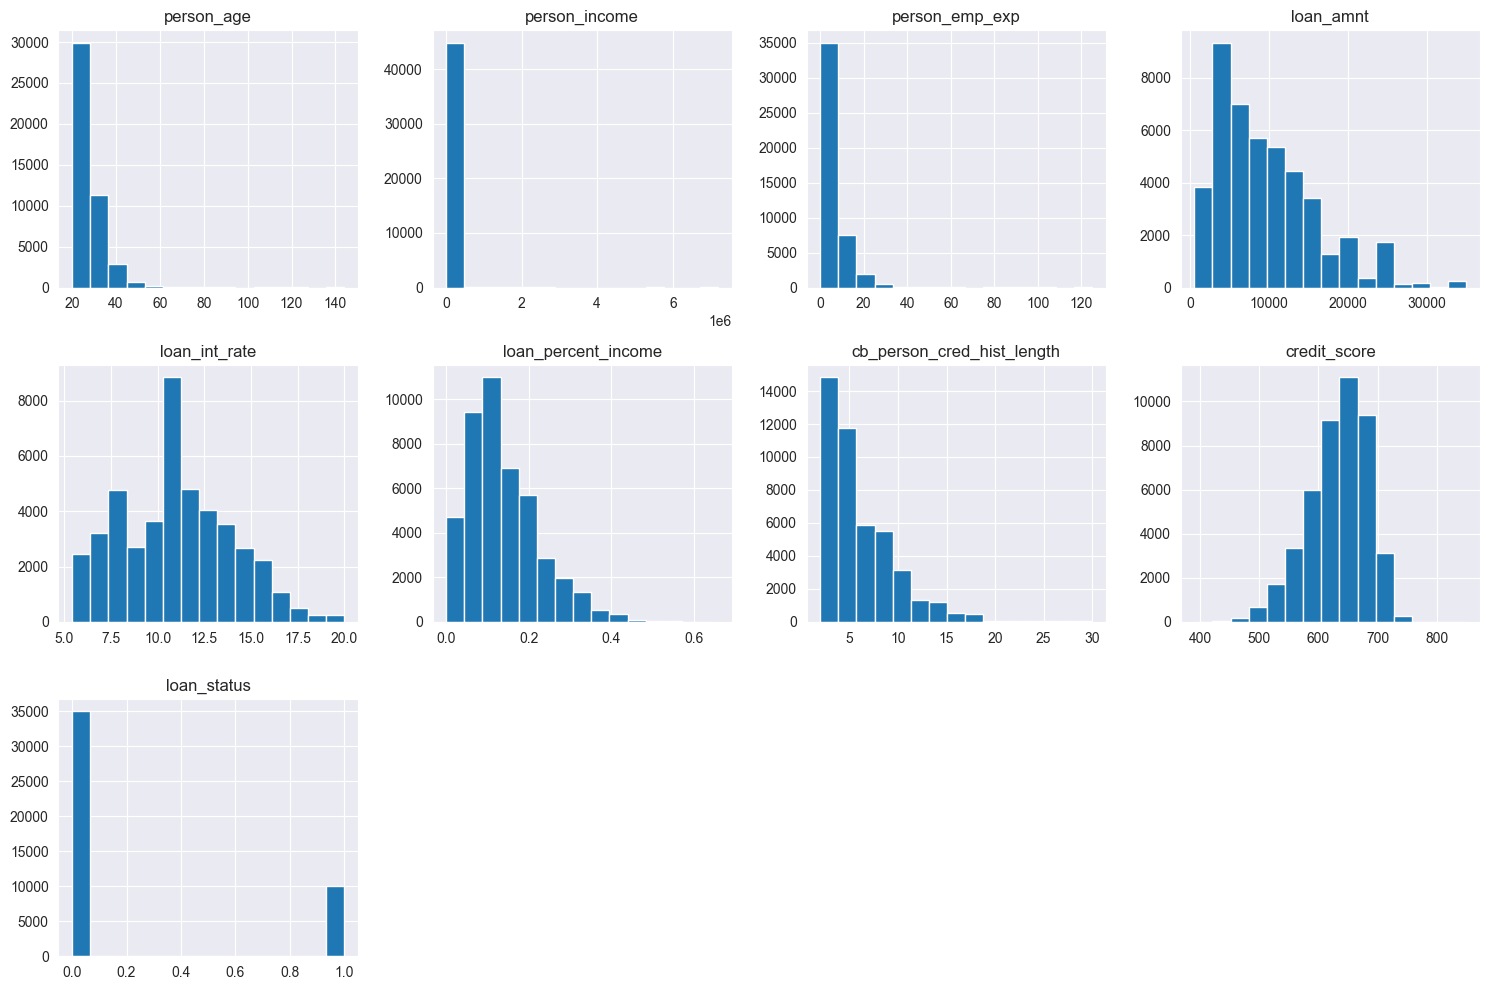

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.tight_layout()
plt.show()

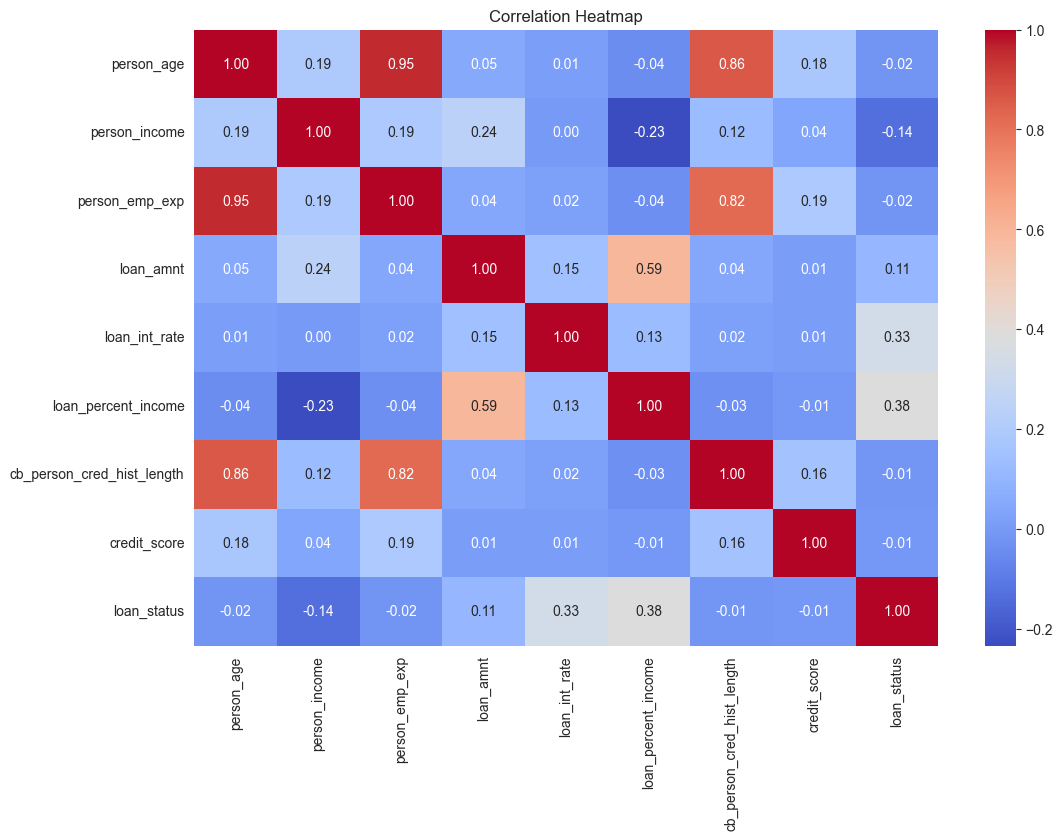

In [5]:
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,1,0,0,1,0,0,0,1,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,0,0,0,1,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,...,1,0,0,1,0,0,1,0,0,0


In [9]:
def num_plot(data, x, hue):
    df["all"] = ""
    f, ax = plt.subplots(1, 3, figsize=(35, 10))
    sns.kdeplot(data=data, x=x, hue=hue, ax=ax[0], multiple='stack')
    sns.violinplot(data=data, x=x, hue=hue, ax=ax[1], y='all')
    sns.boxplot(data=data, x=x, hue=hue, ax=ax[2], y='all')
    df.drop(['all'], axis=1, inplace=True)

    for i in range(3):
        ax[i].spines[['top','right']].set_visible(False)
        ax[i].set_xlabel(x, weight='bold', size=20)
        ax[i].set_ylabel(hue, weight='bold', size=20)
        ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13)
        ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)


        f.suptitle(f"{hue}'s distribution by {x}", weight='bold', size=25)
    plt.show()

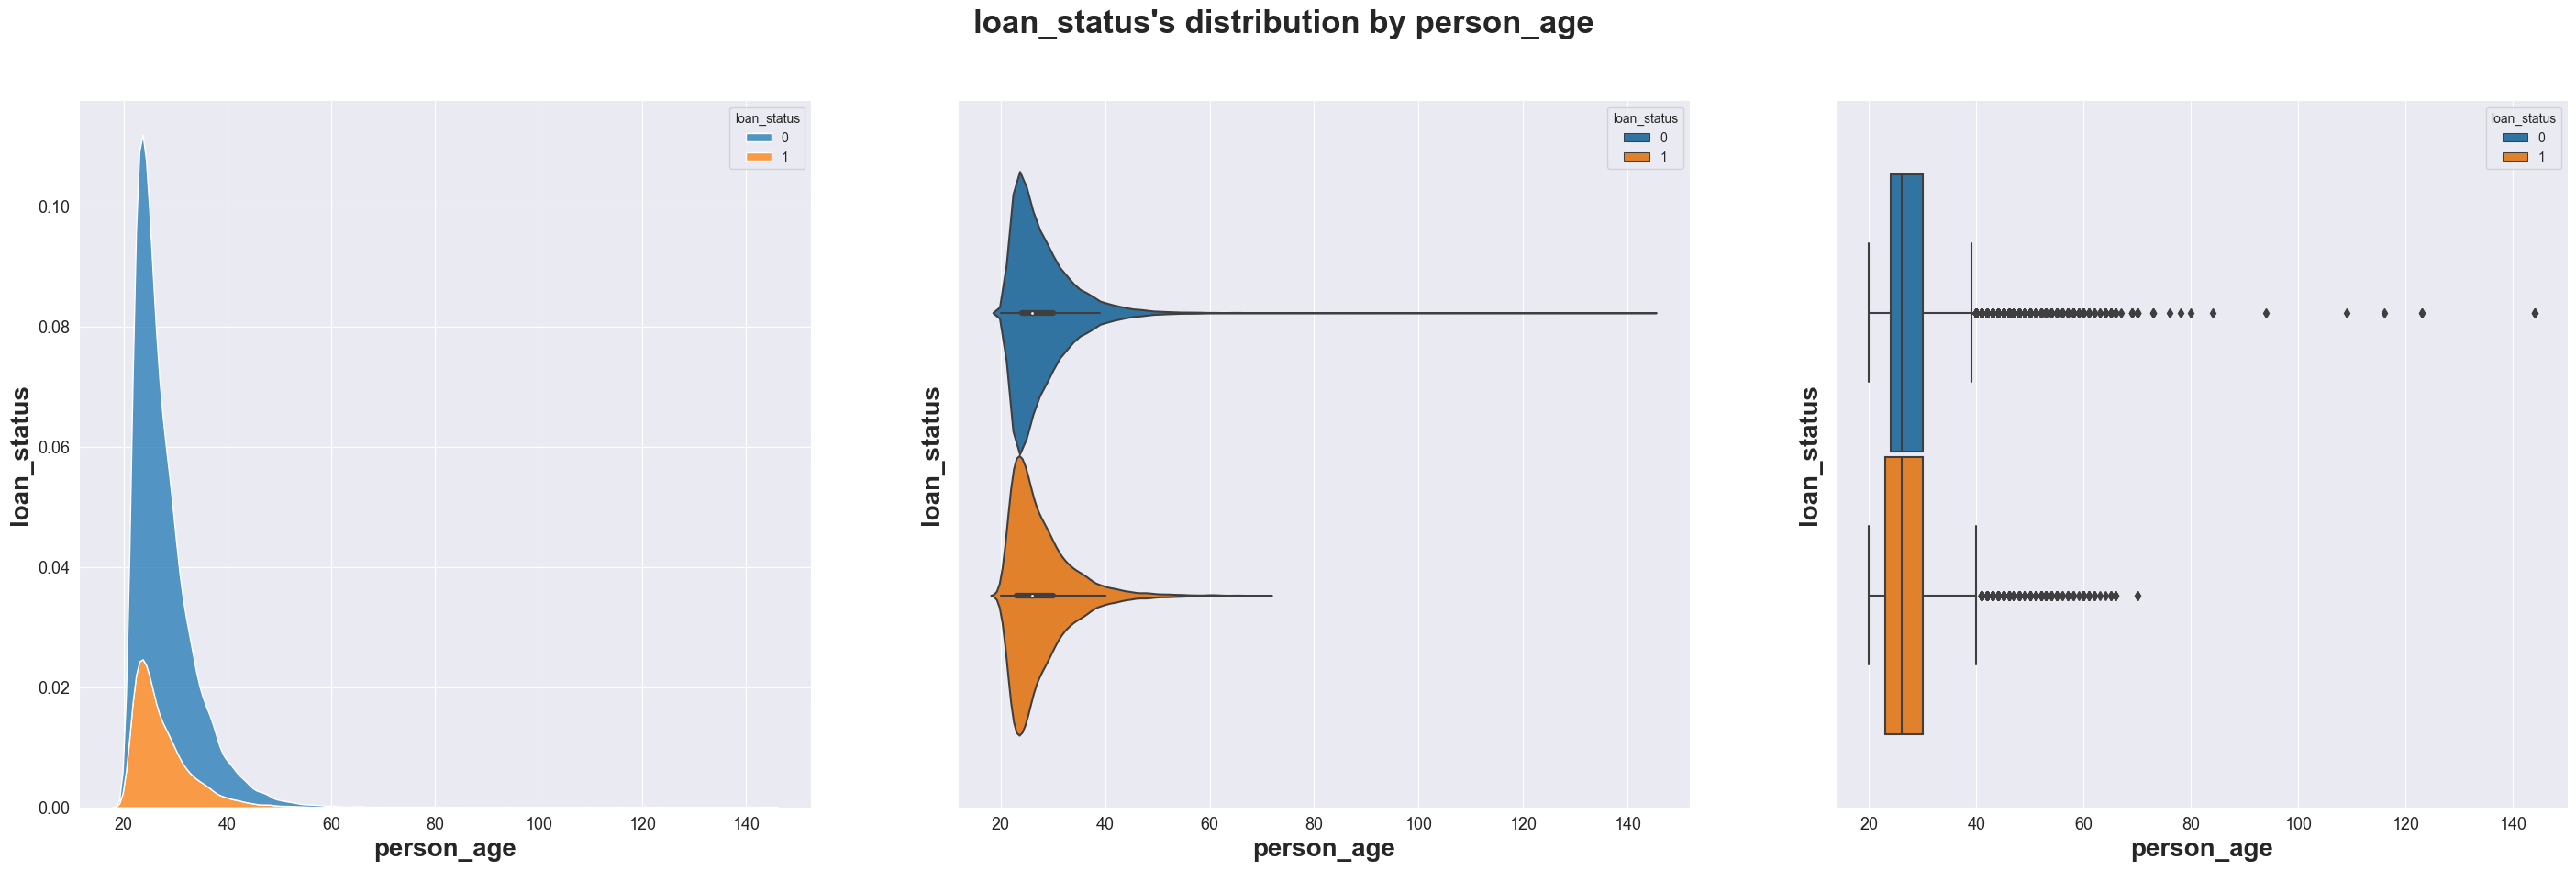

In [10]:
num_plot(data=df, x='person_age', hue='loan_status')

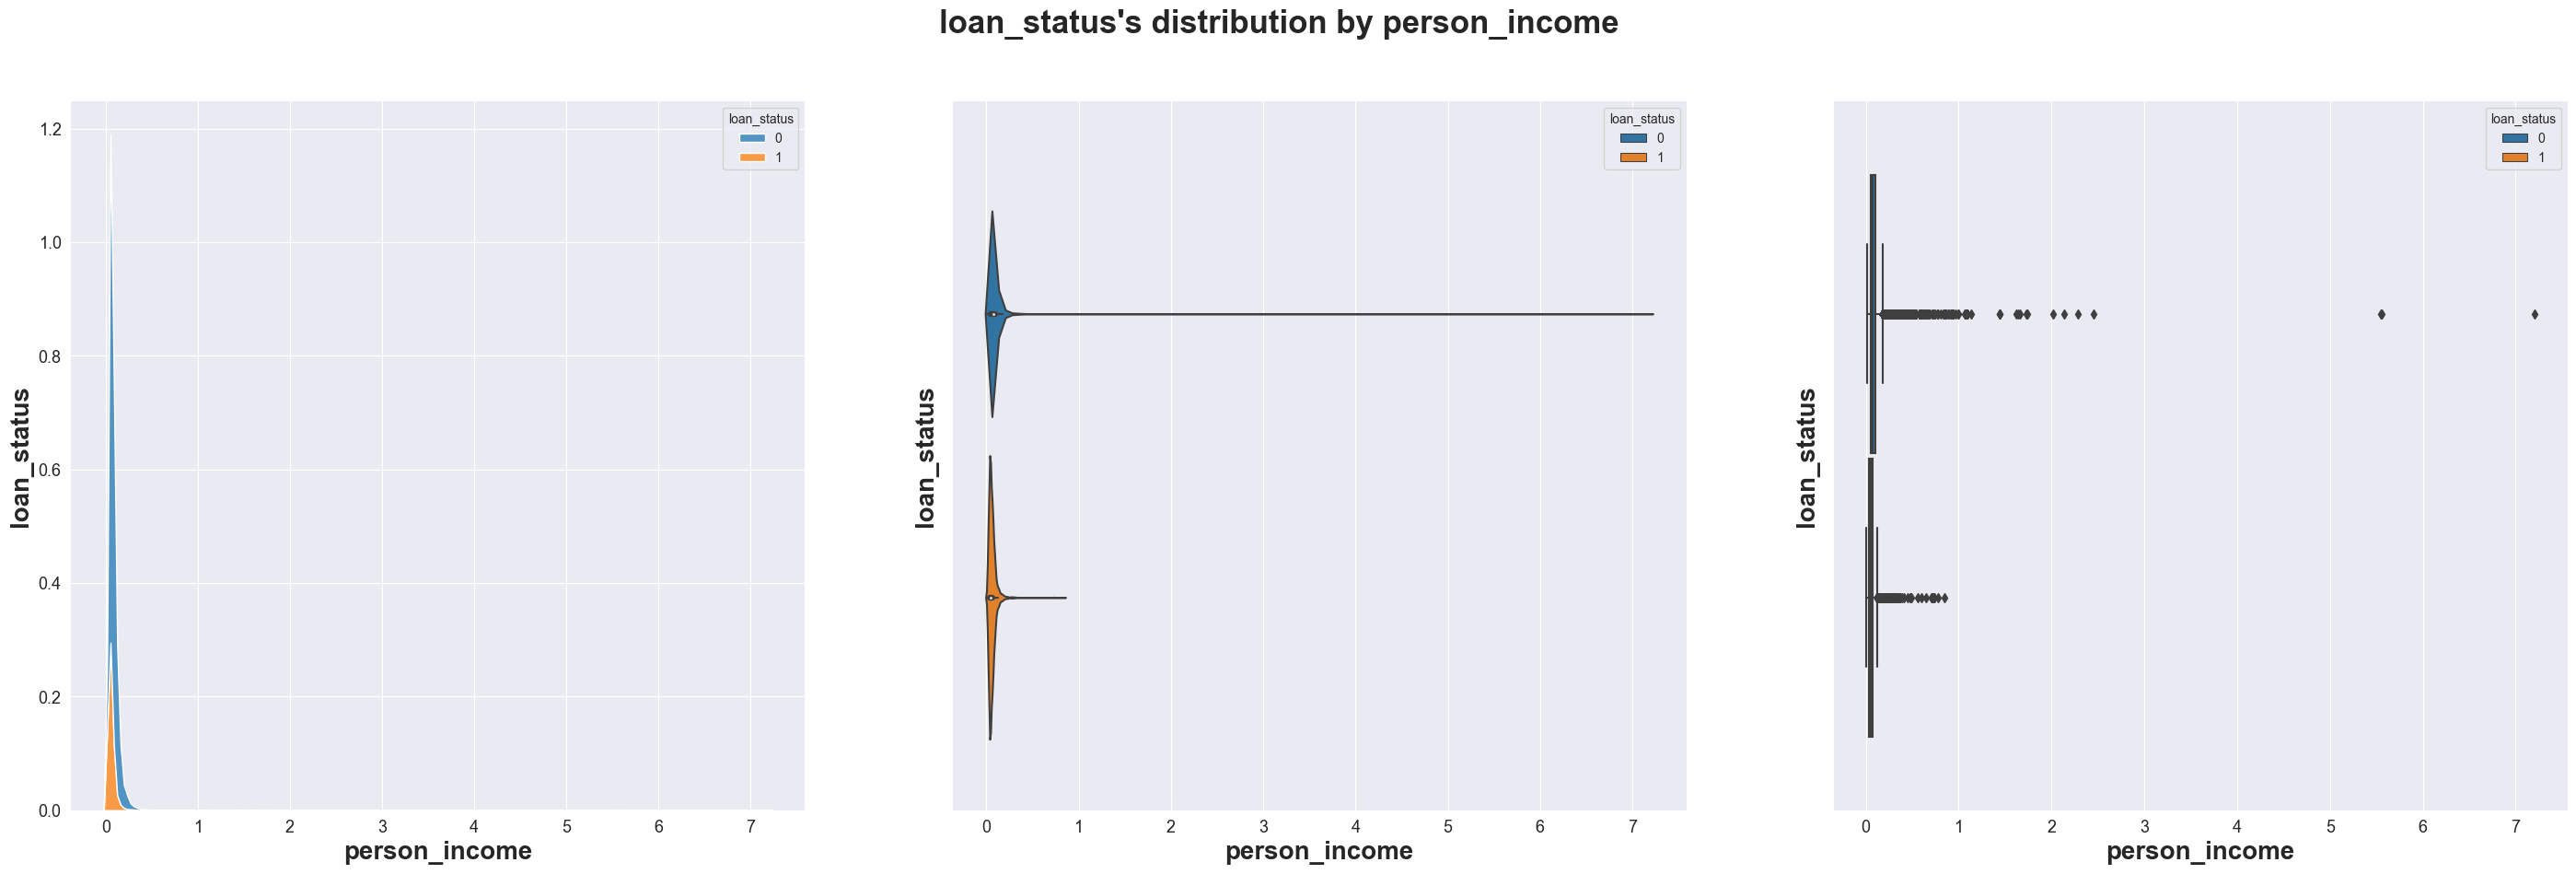

In [11]:
num_plot(data=df, x='person_income', hue='loan_status')

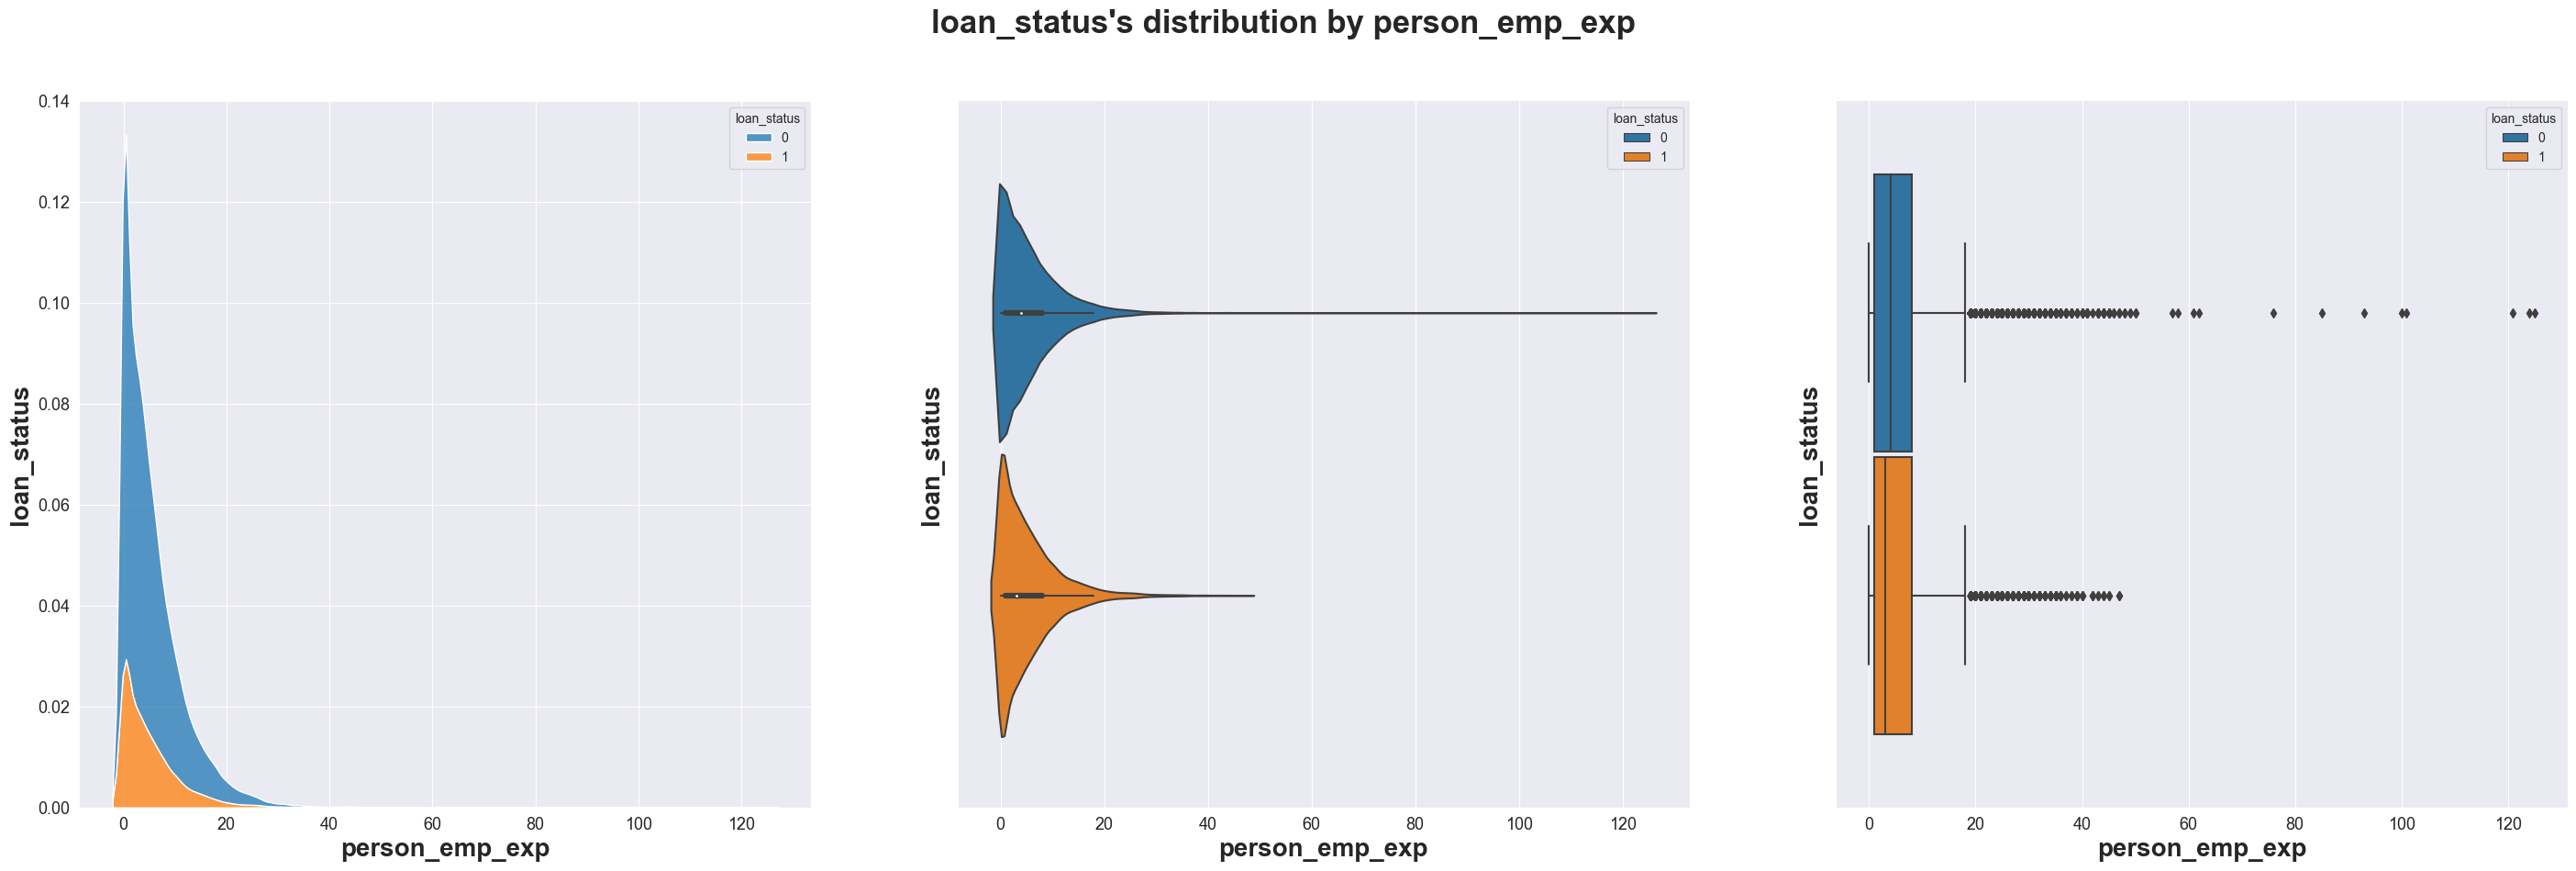

In [12]:
num_plot(data=df, x='person_emp_exp', hue='loan_status')

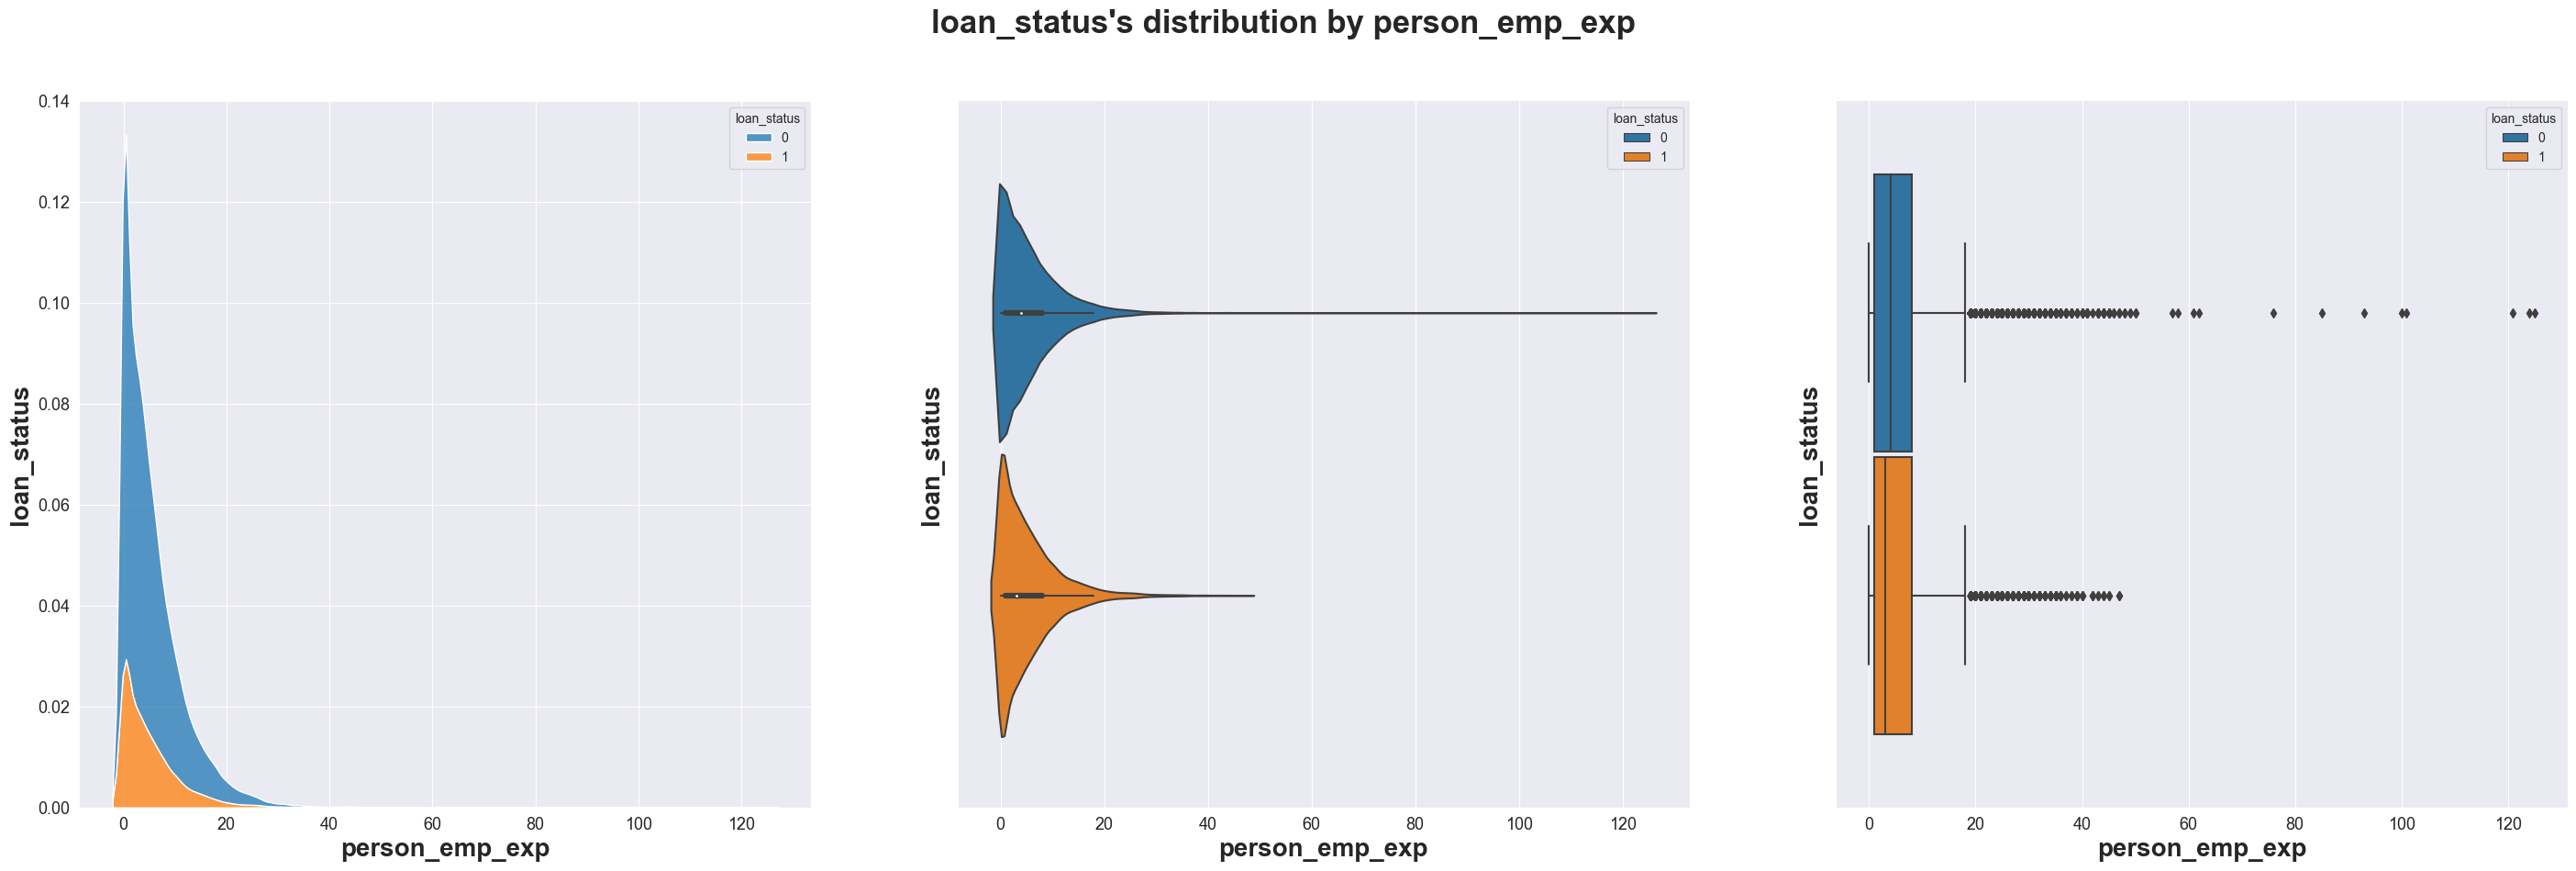

In [13]:
num_plot(data=df, x='person_emp_exp', hue='loan_status')

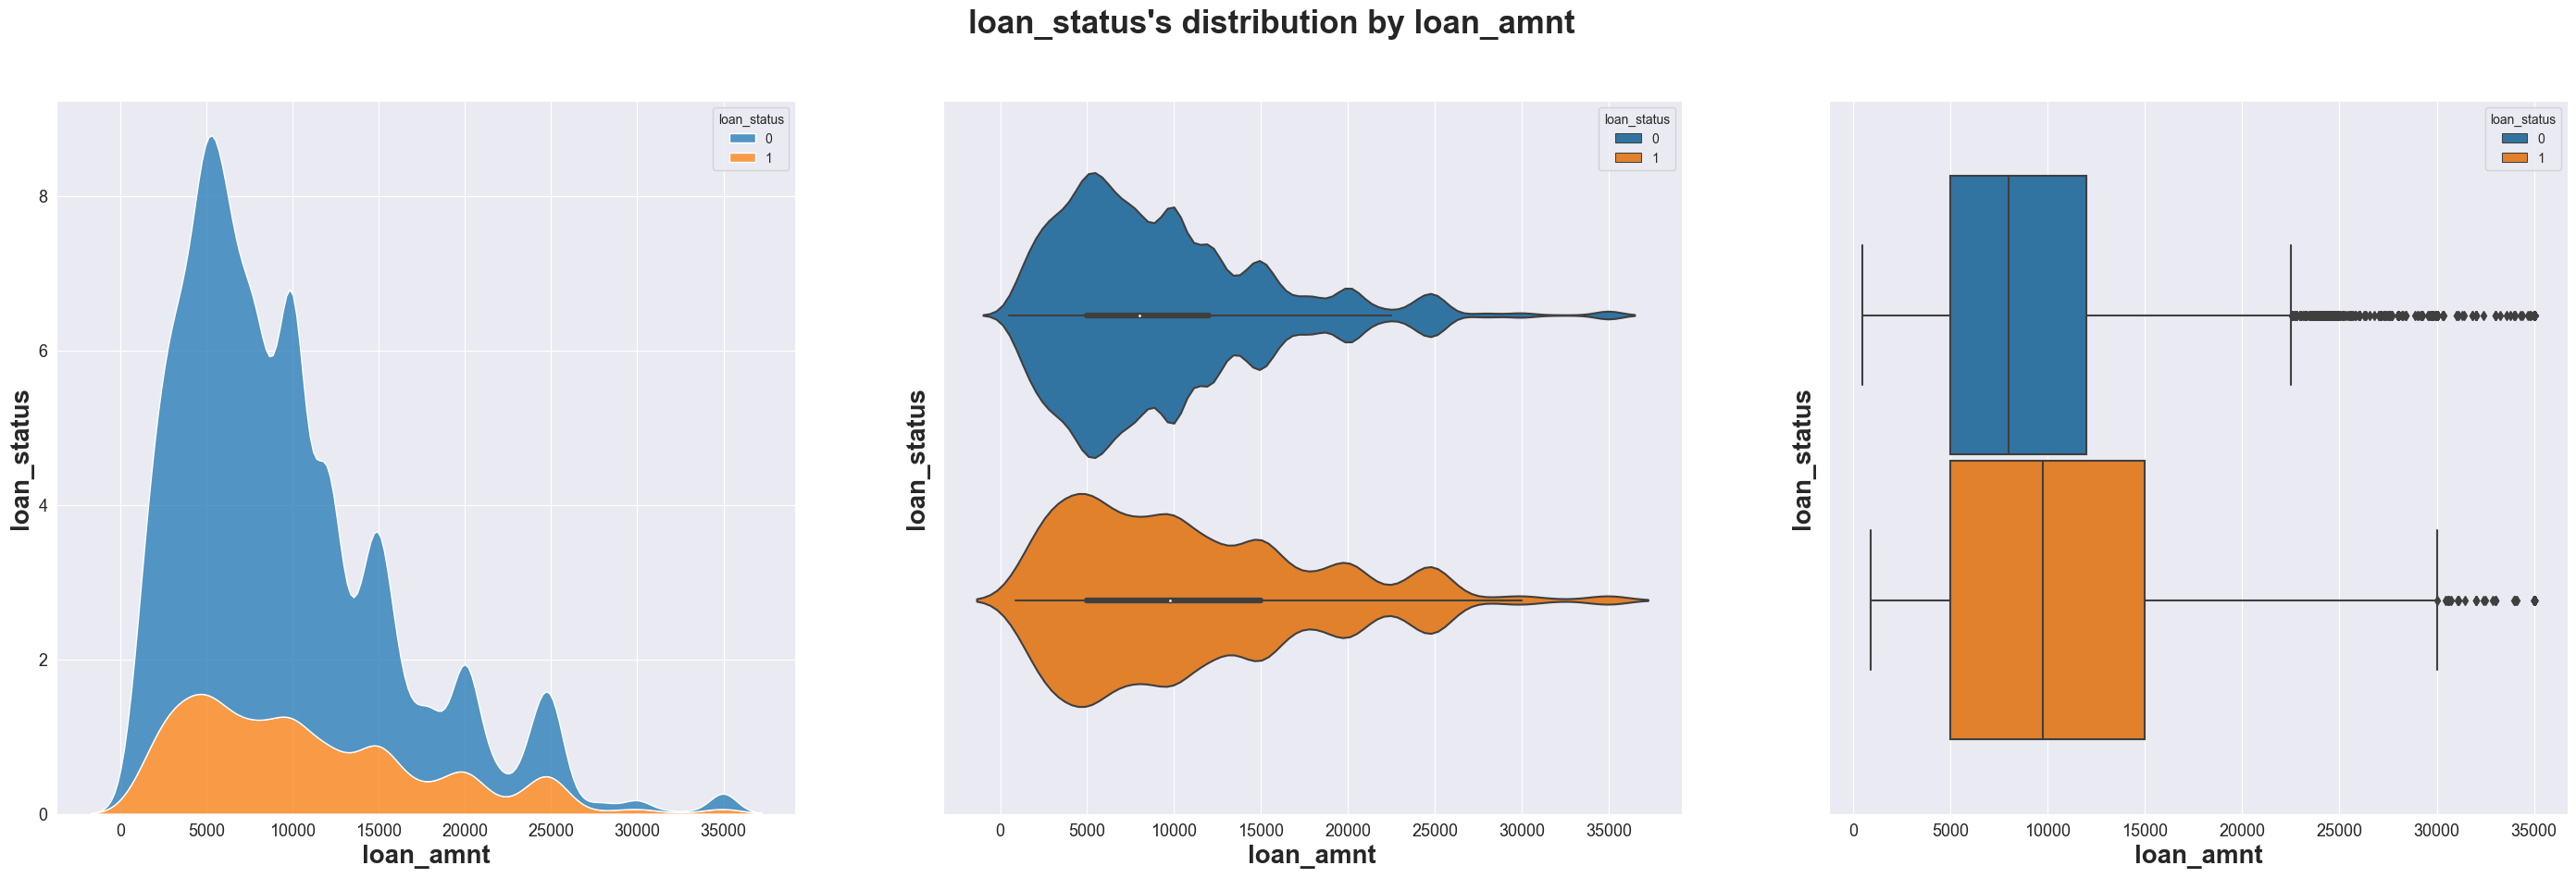

In [14]:
num_plot(data=df, x='loan_amnt', hue='loan_status')

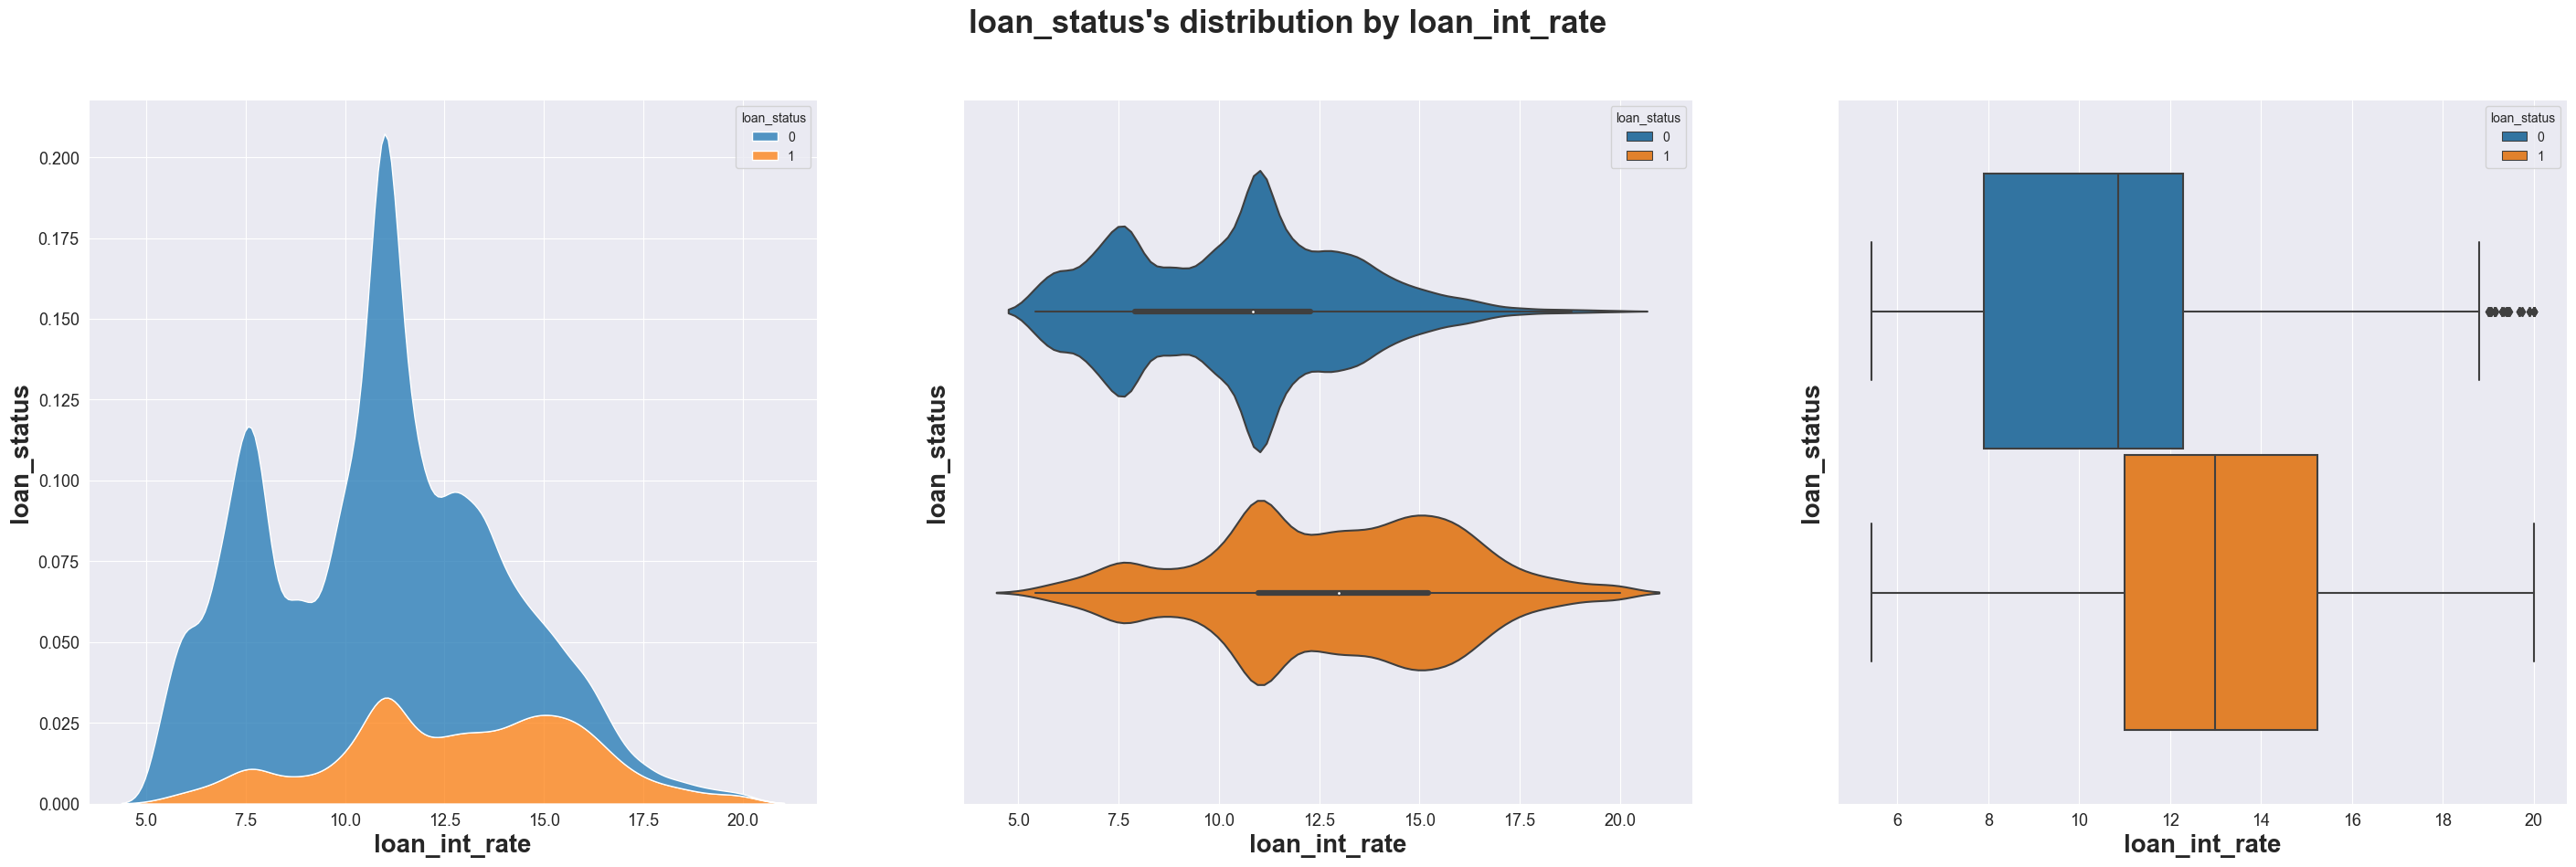

In [15]:
num_plot(data=df, x='loan_int_rate', hue='loan_status')

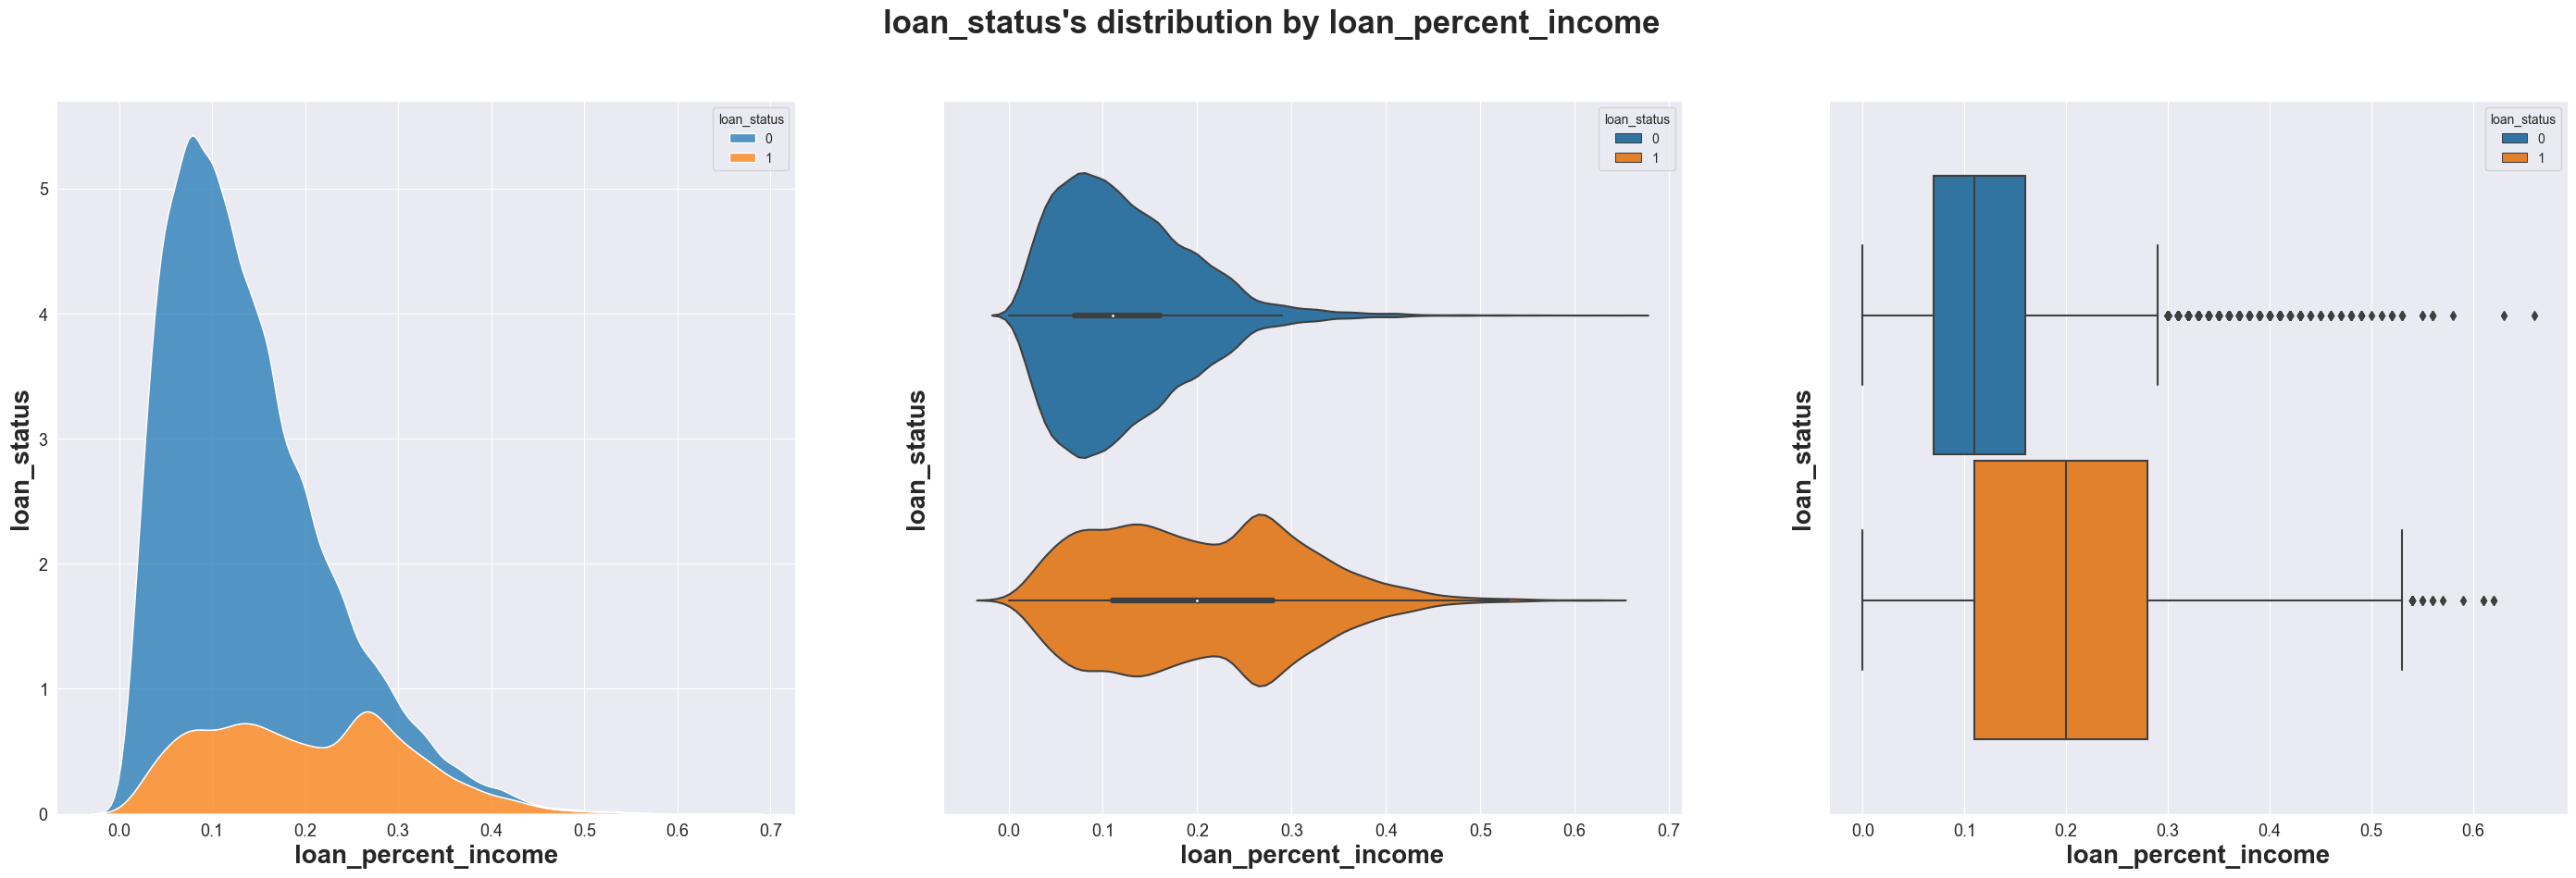

In [16]:
num_plot(data=df, x='loan_percent_income', hue='loan_status')

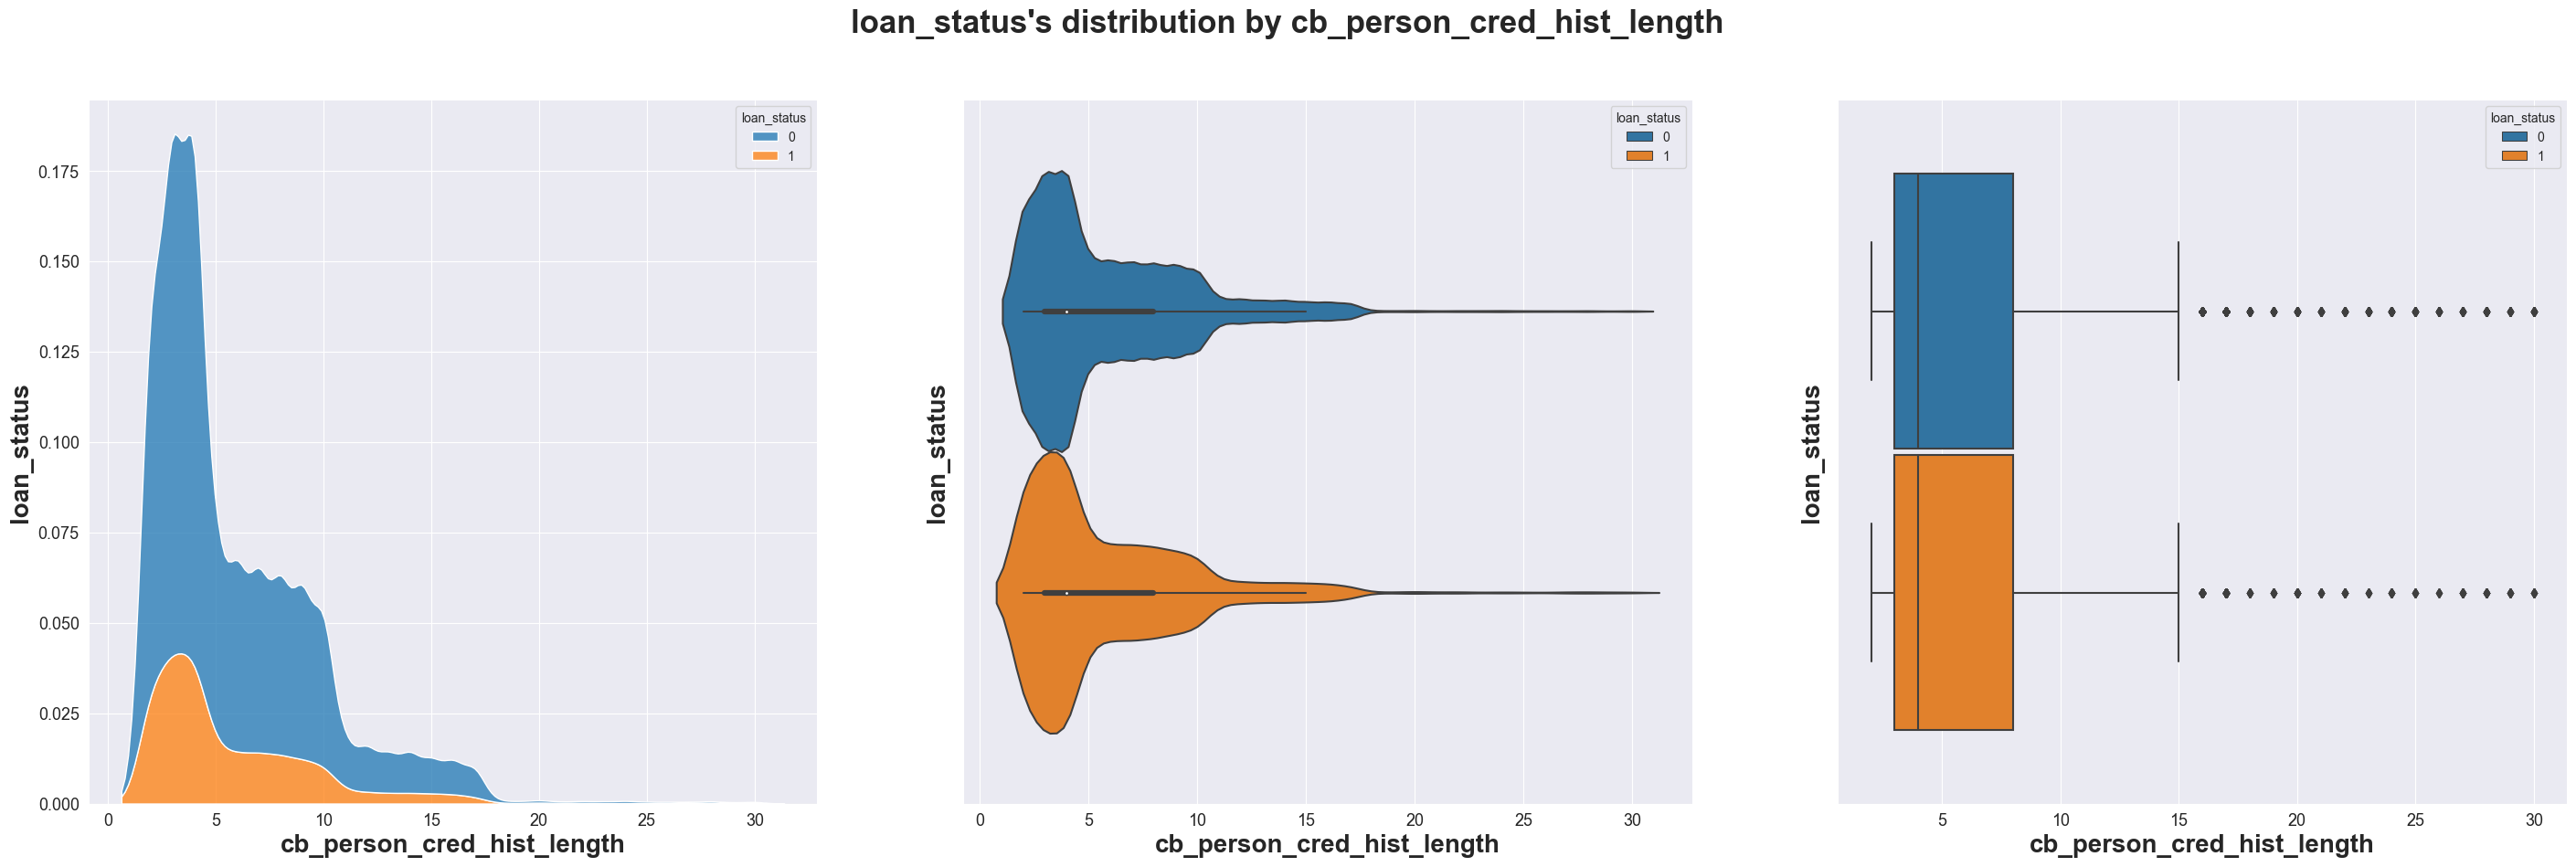

In [17]:
num_plot(data=df, x='cb_person_cred_hist_length', hue='loan_status')

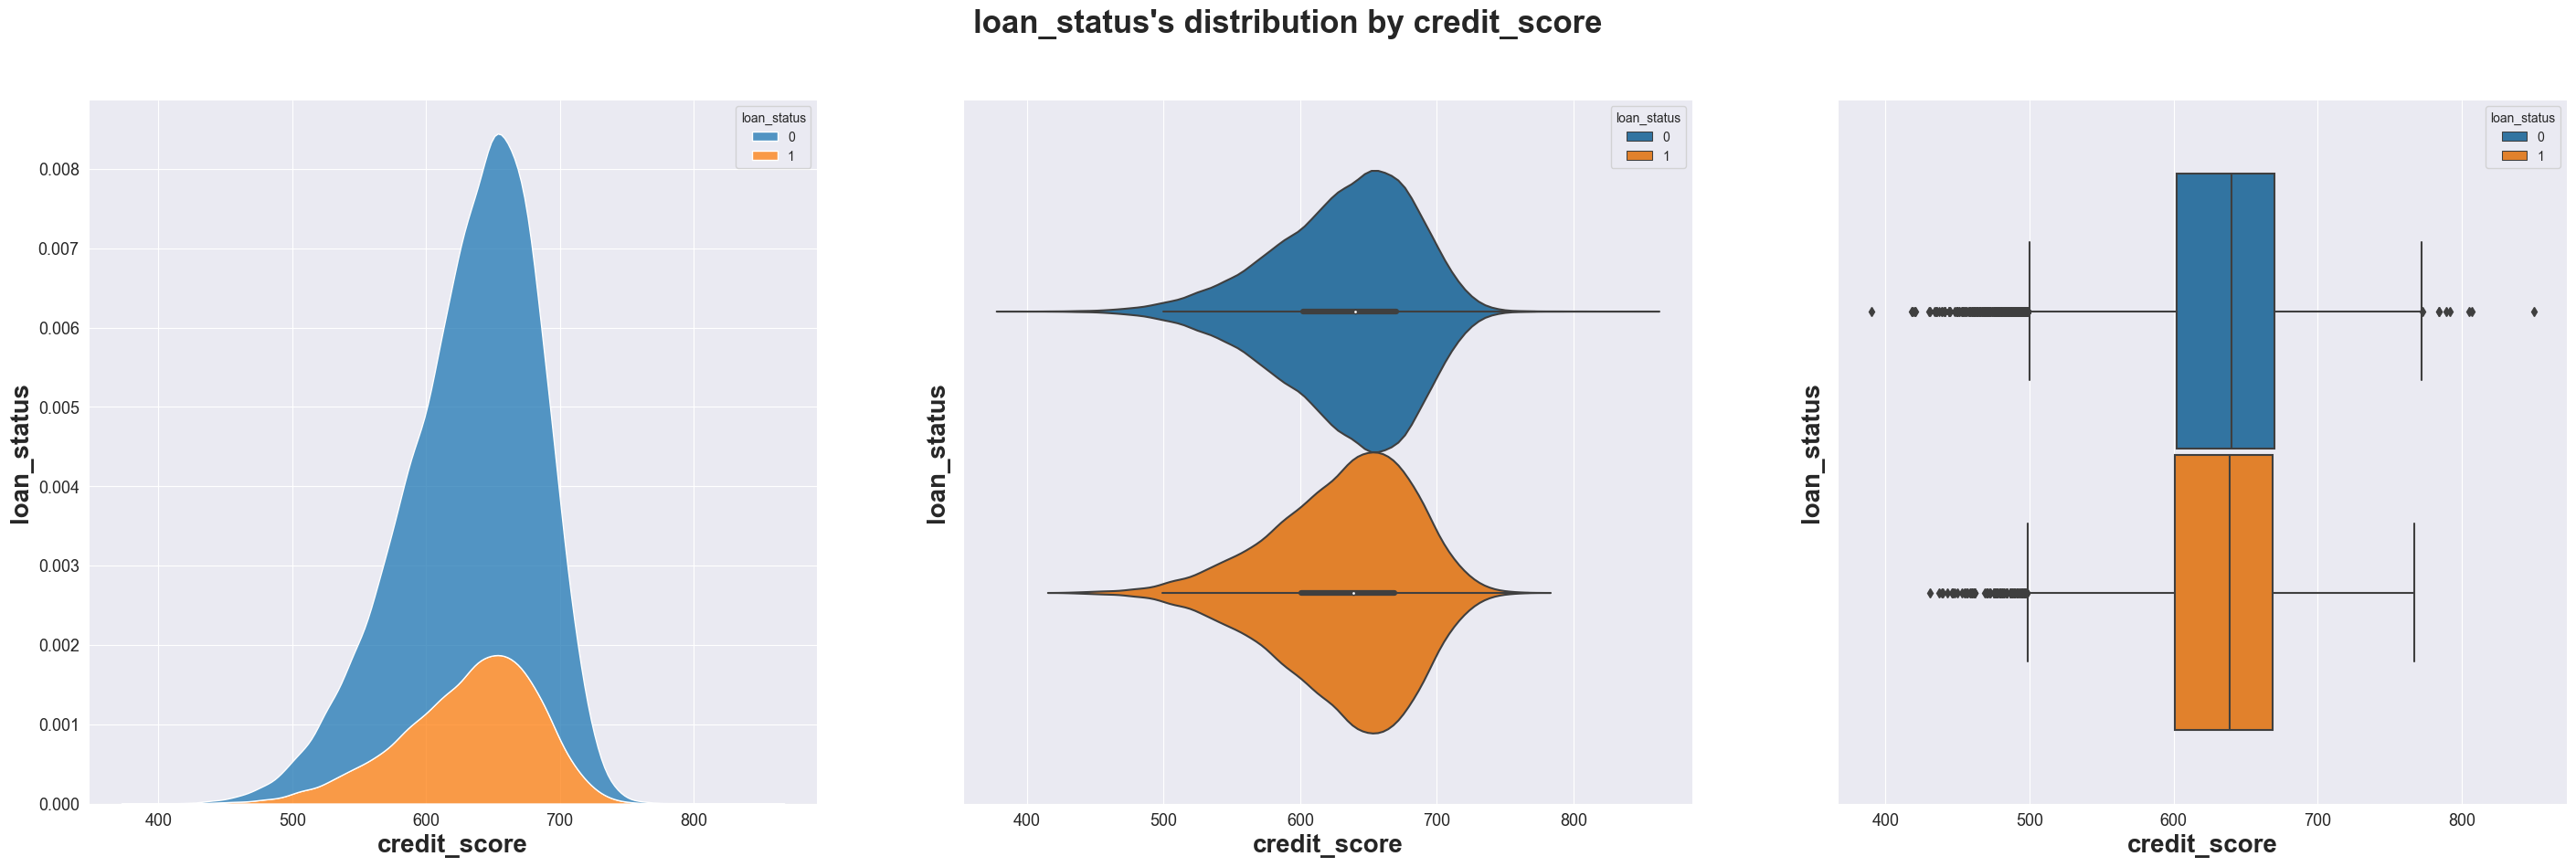

In [18]:
num_plot(data=df, x='credit_score', hue='loan_status')

In [19]:
def cat_plot(data, var, hue, msg_show=True):
    total_cnt = data[var].count()
    f, ax = plt.subplots(1, 2, figsize=(25, 8))
    hues = [None, hue]
    titles = [f"{var}'s distribution", f"{var}'s distribution by {hue}"]

    for i in range(2):
        sns.countplot(x=data[var], edgecolor='black', hue=hues[i], linewidth=1, ax=ax[i], data=data)
        ax[i].set_xlabel(var, weight='bold', size=15)
        ax[i].set_ylabel('Count', weight='bold', size=15)
        ax[i].spines[['top', 'right']].set_visible(False)
        ax[i].set_title(titles[i], size=18, weight='bold')
        ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
        ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)
        for cont in ax[i].containers:
            if msg_show:
                ax[i].bar_label(cont,  fmt=lambda x: f'{x:.0f} \n {x / total_cnt * 100:2.2f}%',
                                size=12, bbox={'facecolor': 'white', 'boxstyle': 'round'}, label_type='center')
        ax[1].legend([0, 1], title=hue, loc='best', title_fontsize=13)

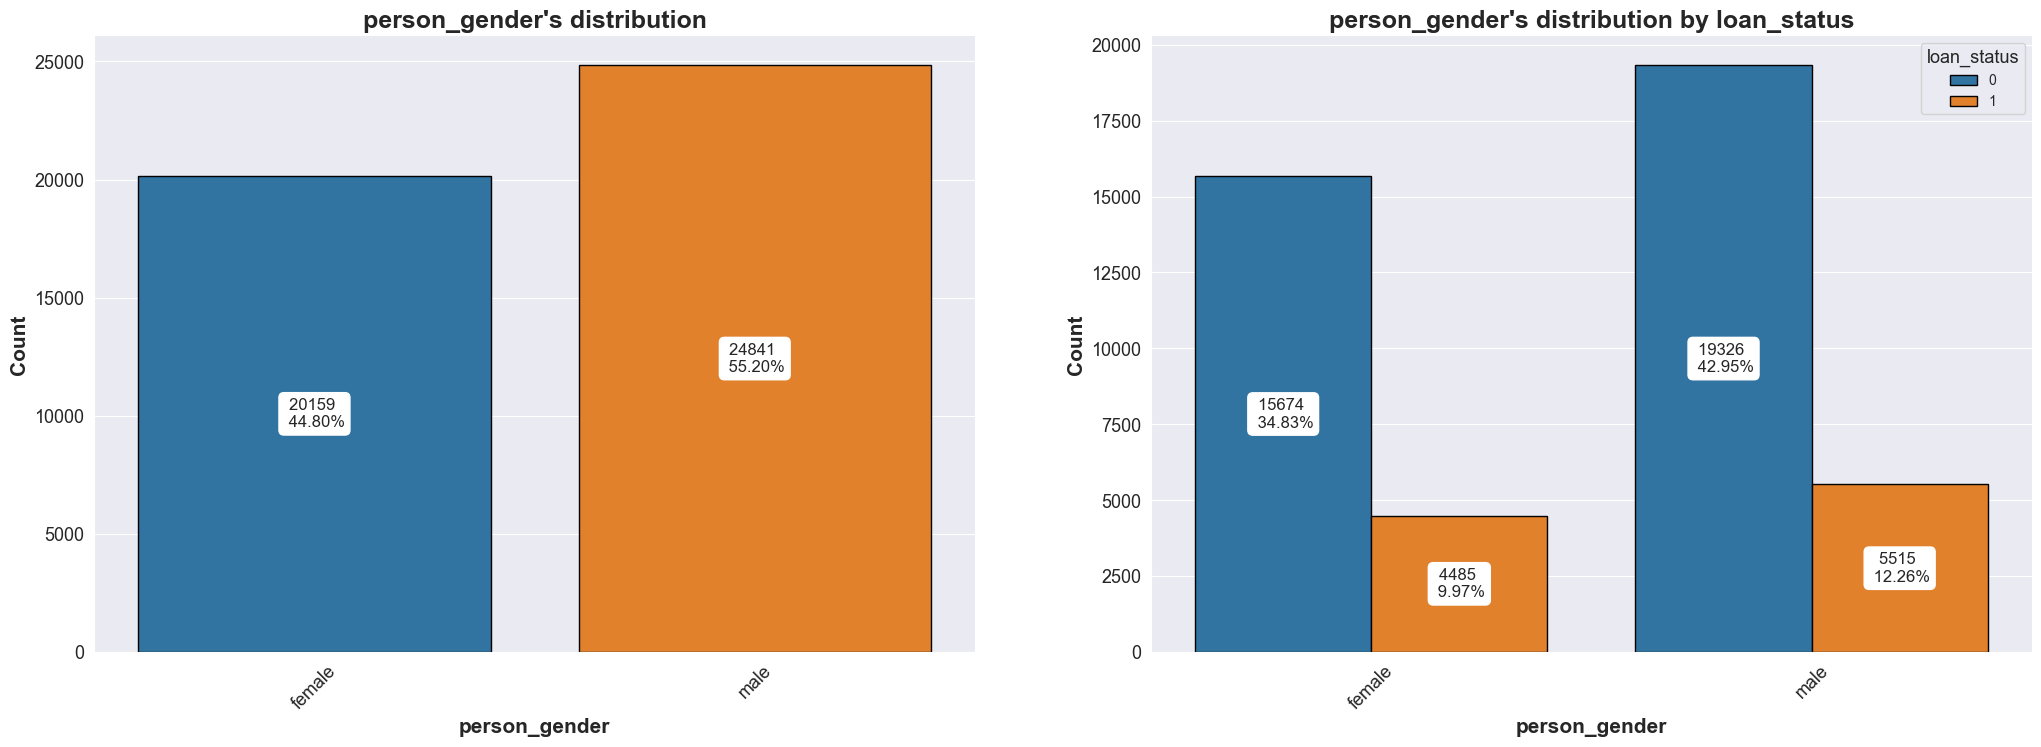

In [20]:
cat_plot(data=df, var='person_gender', hue='loan_status')

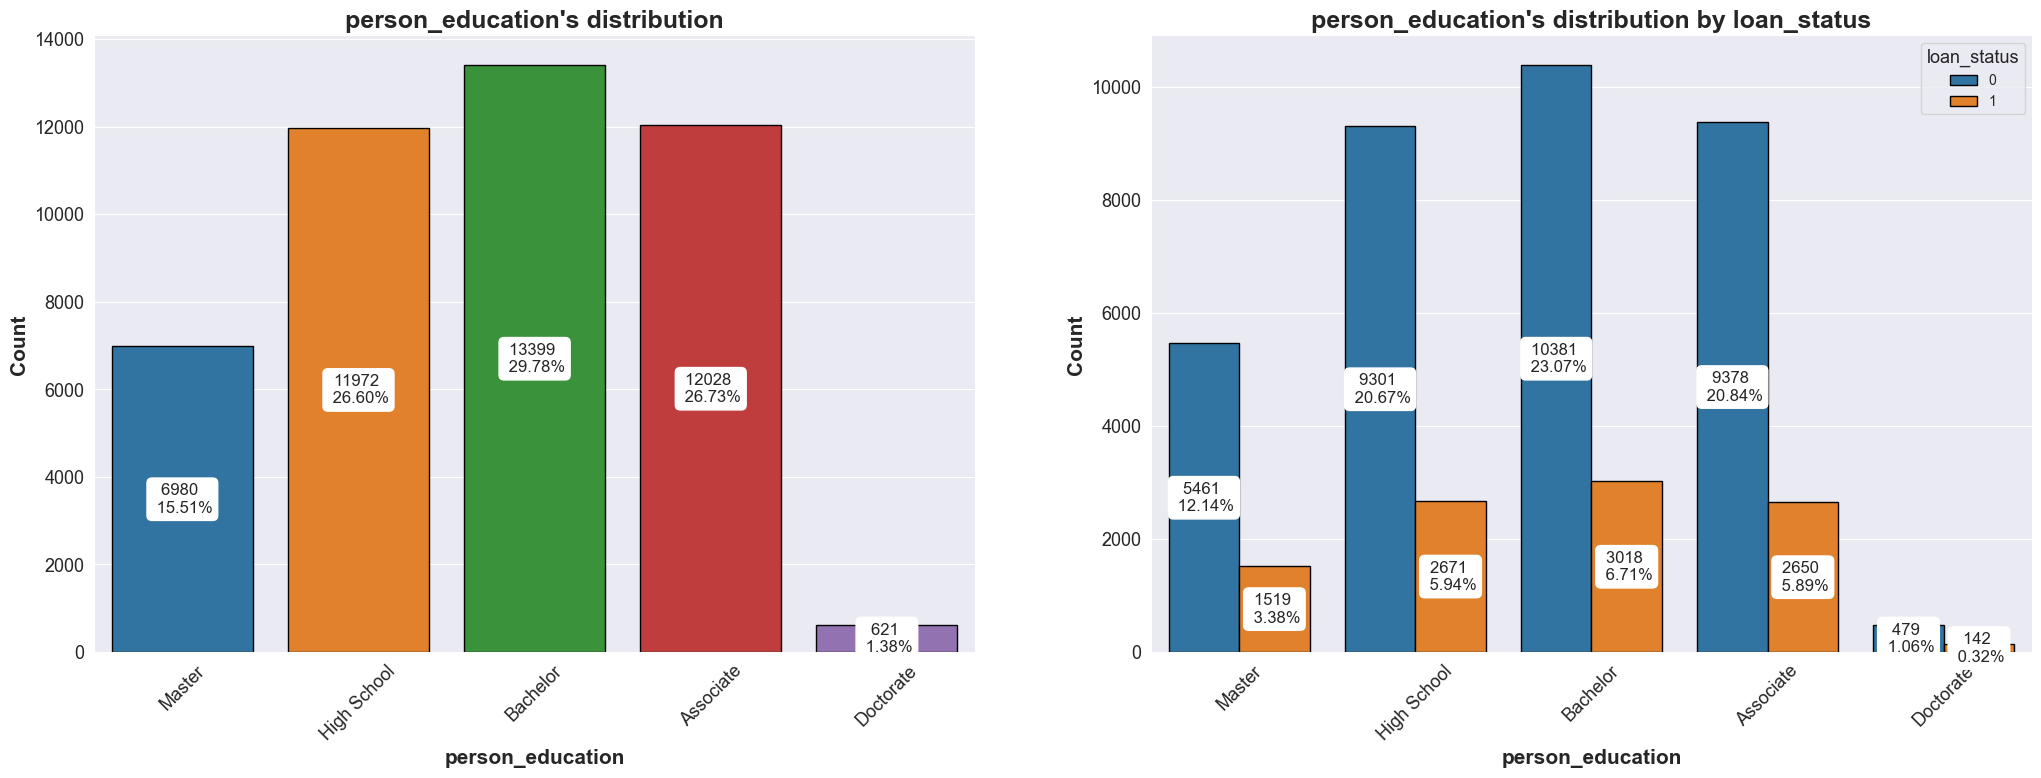

In [21]:
cat_plot(data=df, var='person_education', hue='loan_status')

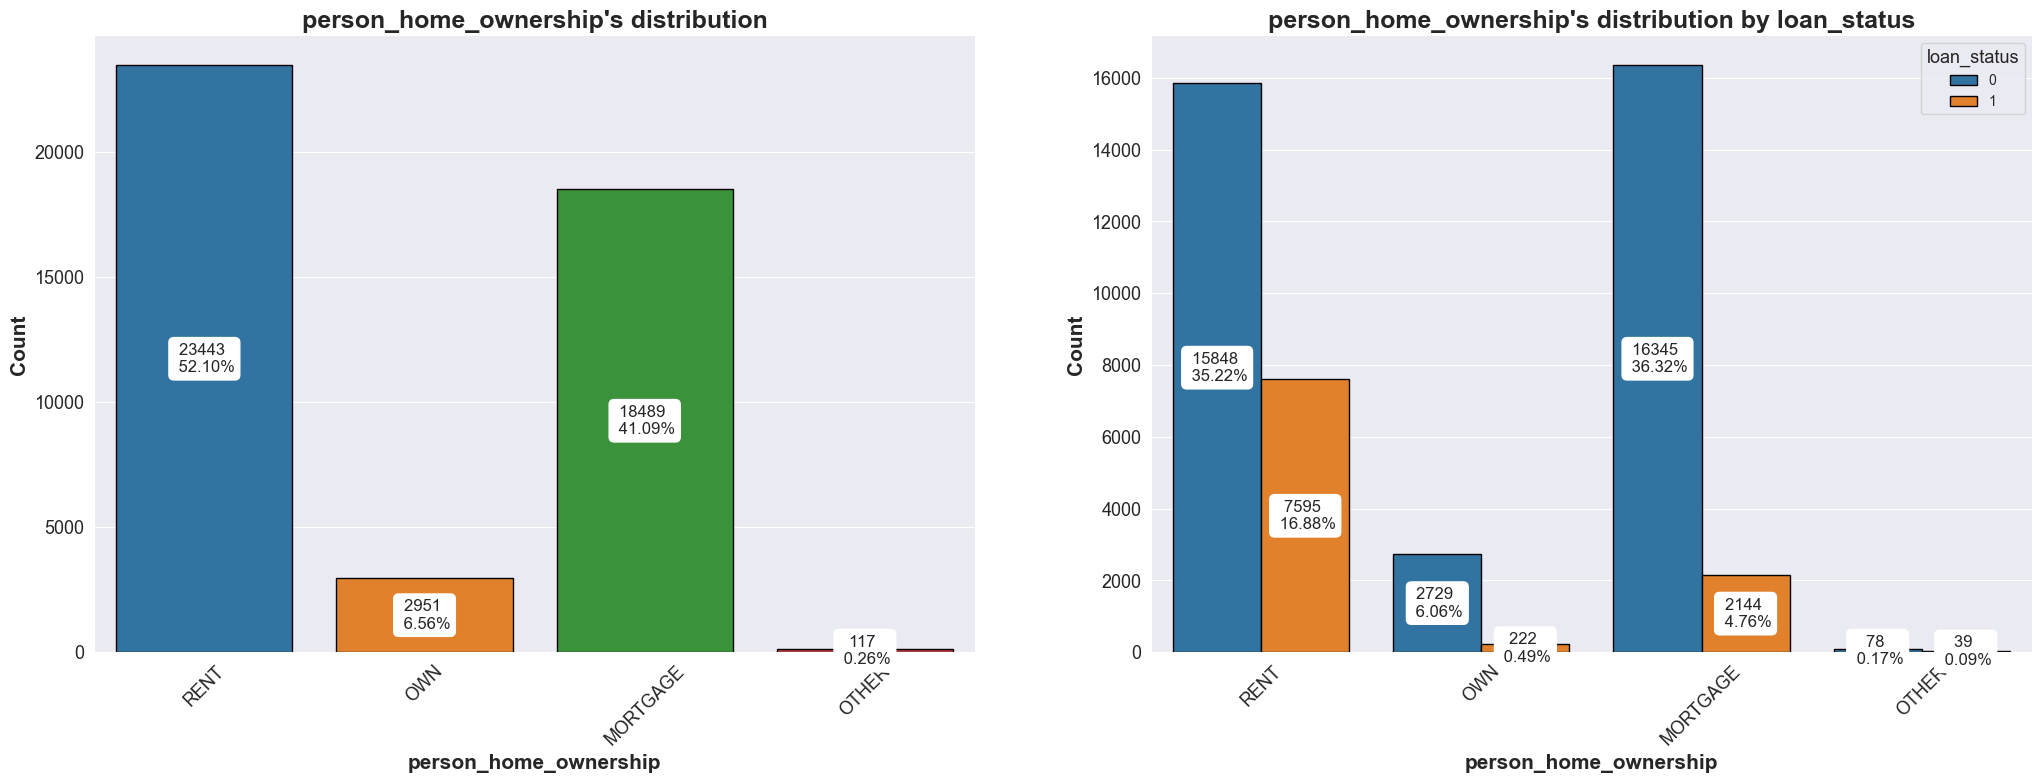

In [22]:
cat_plot(data=df, var='person_home_ownership', hue='loan_status')

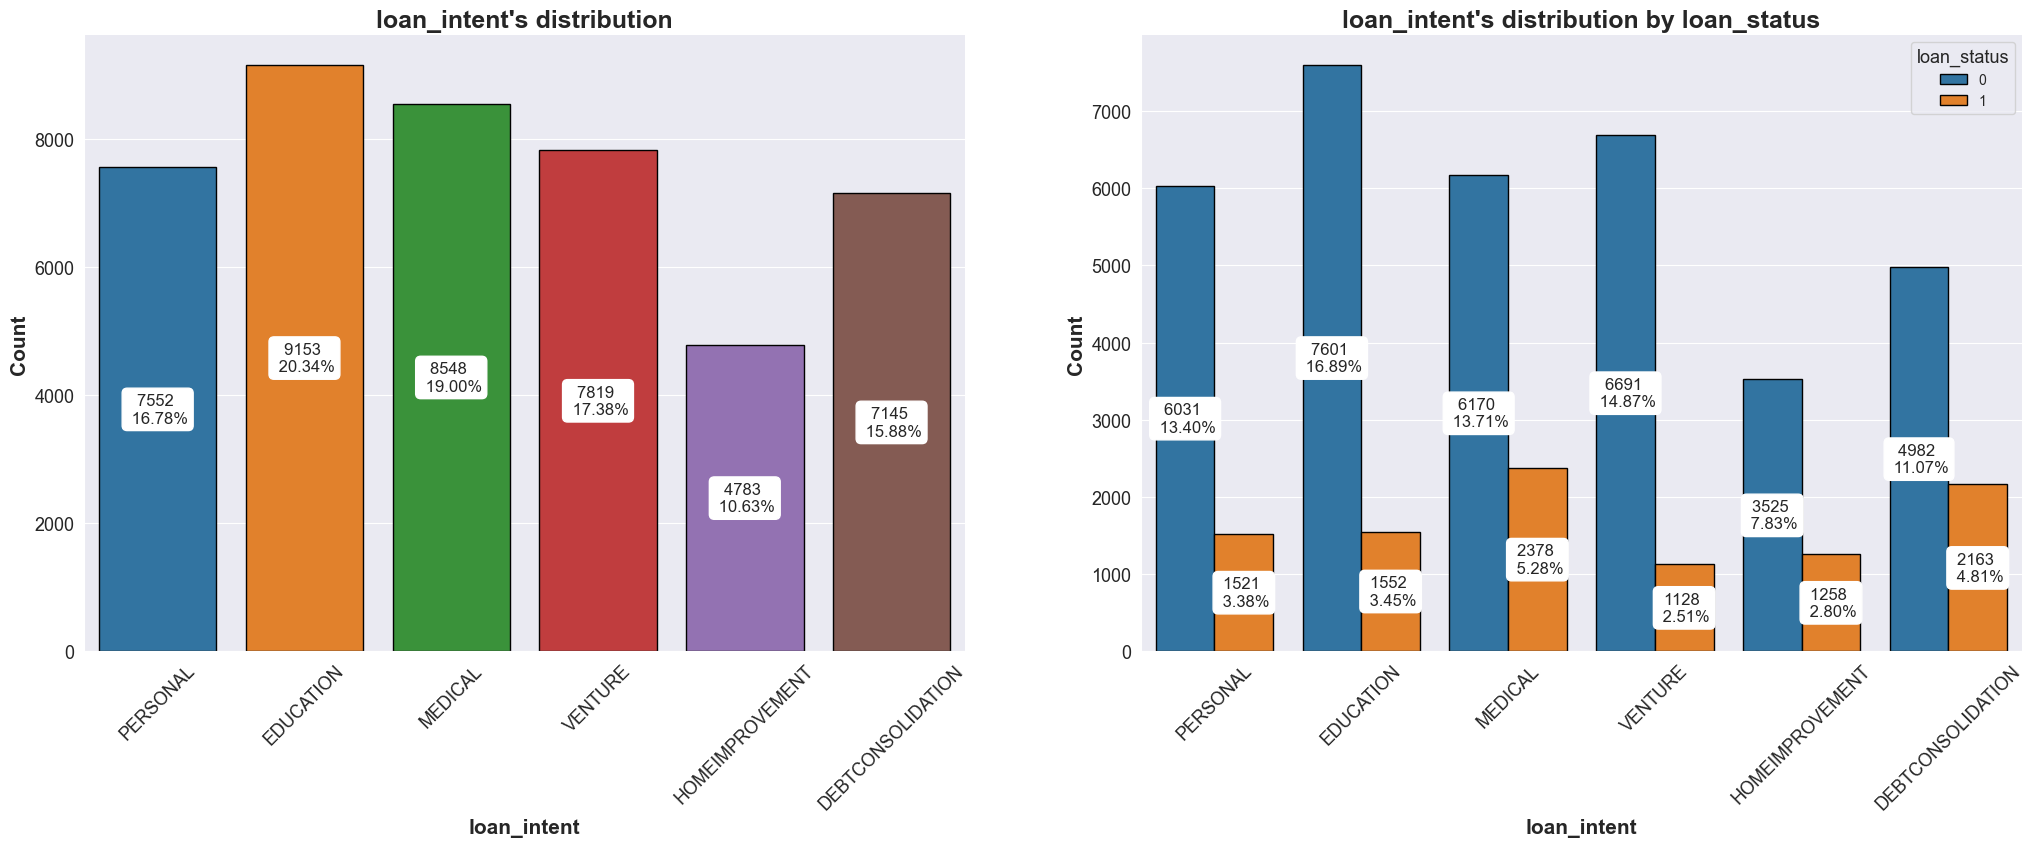

In [23]:
cat_plot(data=df, var='loan_intent', hue='loan_status')

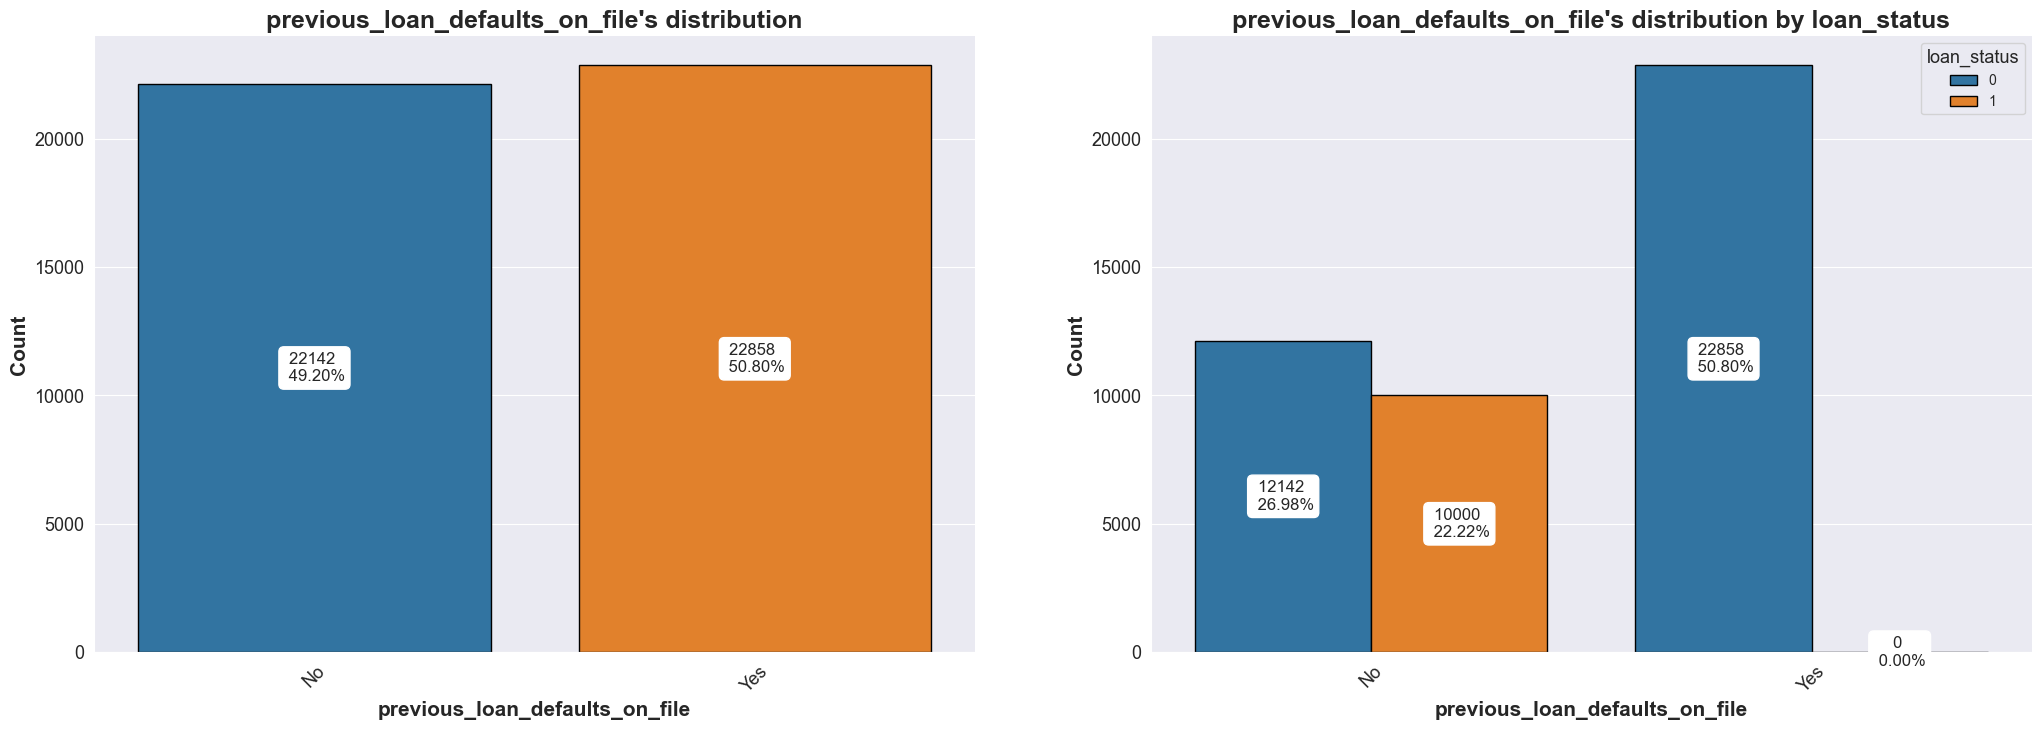

In [24]:
cat_plot(data=df, var='previous_loan_defaults_on_file', hue='loan_status')

In [27]:
target_col = 'loan_status'
df[target_col].value_counts()

0    35000
1    10000
Name: loan_status, dtype: int64

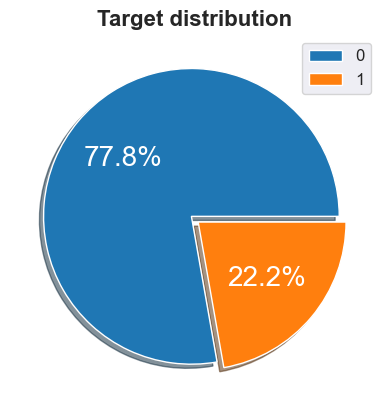

In [28]:
plt.subplots()
plt.pie(df[target_col].value_counts(), shadow=True, explode=[.03,.03], autopct='%1.1f%%', textprops={'fontsize': 20, 'color': 'white'})
plt.title('Target distribution', size=16, weight='bold')
plt.legend([0, 1], loc='best', fontsize=12);

In [29]:
df= df[df['previous_loan_defaults_on_file'] == 'No']

In [30]:
df = df.drop(['previous_loan_defaults_on_file','person_gender'], axis=1)
df.reset_index(drop=True, inplace=True)

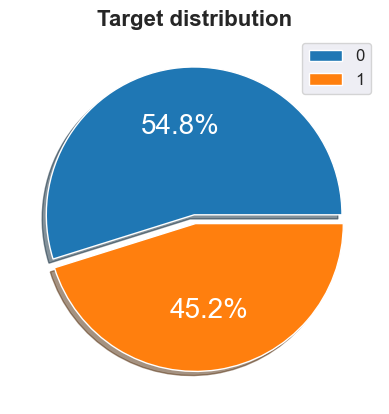

In [31]:
plt.subplots()
plt.pie(df[target_col].value_counts(), shadow=True, explode=[.03,.03], autopct='%1.1f%%', textprops={'fontsize': 20, 'color': 'white'})
plt.title('Target distribution', size=16, weight='bold')
plt.legend([0, 1], loc='best', fontsize=12);